### **Retinopathy Disease Prediction using Machine Learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### **Data Overview**

• **Features:**
- ***Age:*** Continuous variable representing the age of the patient.
- ***Systolic Blood Pressure:*** Continuous variable for the pressure in the arteries when the heart beats.
- ***Diastolic Blood Pressure:*** Continuous variable for the pressure in the arteries when the heart rests between beats.
- ***Cholesterol:*** Continuous variable for the cholesterol level.

• **Target:**
- ***Has Retinopathy:*** Binary variable indicating the presence (1) or absence (0) of retinopathy.

In [2]:
df = pd.read_csv('retinopathy.csv')
df.head()

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
0,77.196340,85.288742,80.021878,79.957109,1.0
1,63.529850,99.379736,84.852361,110.382411,1.0
2,69.003986,111.349455,109.850616,100.828246,1.0
3,82.638210,95.056128,79.666851,87.066303,1.0
4,78.346286,109.154591,90.713220,92.511770,1.0


In [3]:
df.tail()

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
5995,49.611850,94.857639,86.615671,107.643986,0.0
5996,63.099686,100.039527,93.515186,104.971404,1.0
5997,55.562243,98.421446,102.697875,120.875951,1.0
5998,63.468956,106.809289,88.060631,106.052213,1.0
5999,62.506825,96.900784,86.878033,108.625436,0.0


In [4]:
df.shape

(6000, 5)

In [5]:
df.columns

Index(['age', 'systolic_blood_pressure', 'diastolic_blood_pressure',
       'cholesterol', 'has_retinopathy'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

age                         0
systolic_blood_pressure     0
diastolic_blood_pressure    0
cholesterol                 0
has_retinopathy             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       6000 non-null   float64
 1   systolic_blood_pressure   6000 non-null   float64
 2   diastolic_blood_pressure  6000 non-null   float64
 3   cholesterol               6000 non-null   float64
 4   has_retinopathy           6000 non-null   float64
dtypes: float64(5)
memory usage: 234.5 KB


In [9]:
df.describe()

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255,0.514500
std,8.564392,10.669267,9.648200,10.433915,0.499831
min,35.164761,69.675429,62.807105,69.967453,0.000000
25%,54.371941,93.267420,83.641788,93.202373,0.000000
50%,59.831159,100.119926,89.912429,100.060637,1.000000
75%,65.809652,107.439501,96.682405,107.250829,1.000000
max,103.279497,151.699660,133.456382,148.233544,1.000000


In [10]:
df.nunique()

age                         6000
systolic_blood_pressure     6000
diastolic_blood_pressure    6000
cholesterol                 6000
has_retinopathy                2
dtype: int64

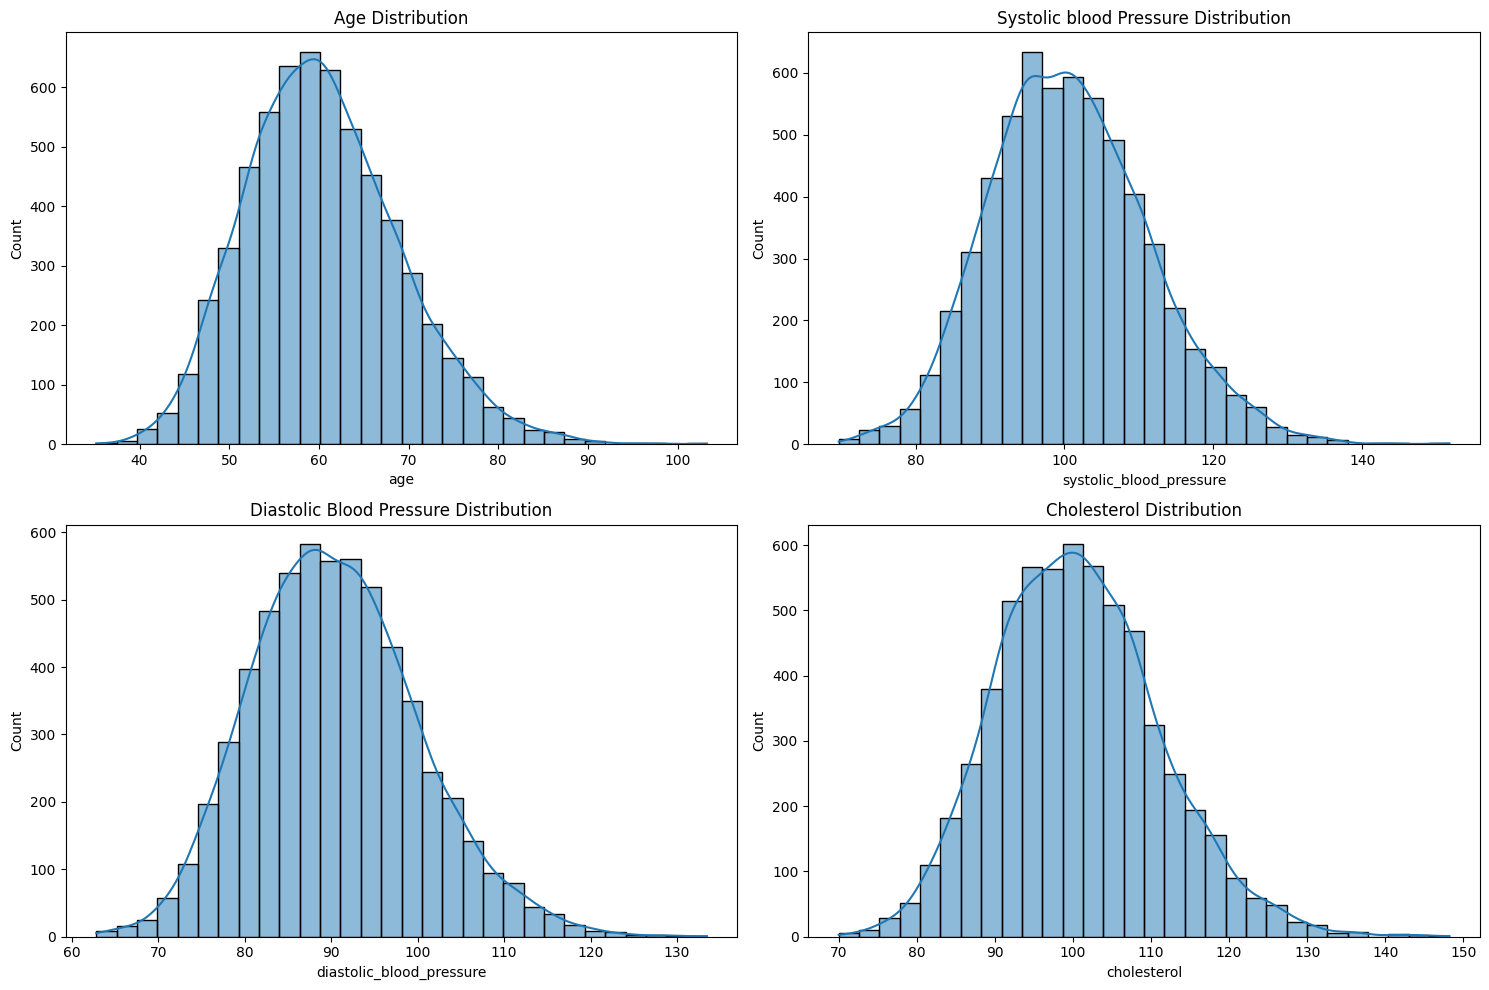

In [12]:
fig, axes =  plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['systolic_blood_pressure'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Systolic blood Pressure Distribution')

sns.histplot(df['diastolic_blood_pressure'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Blood Pressure Distribution')

sns.histplot(df['cholesterol'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Cholesterol Distribution')

plt.tight_layout()
plt.show()

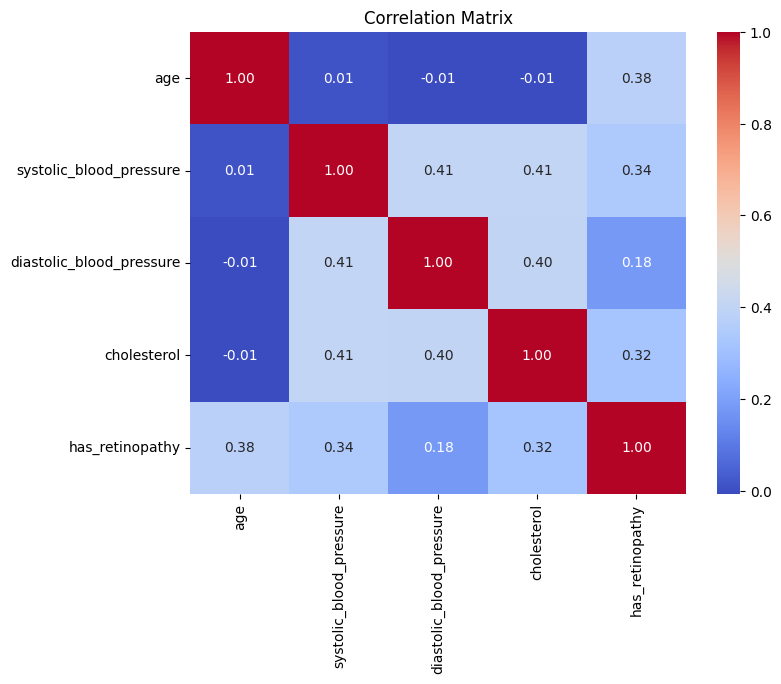

In [13]:
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

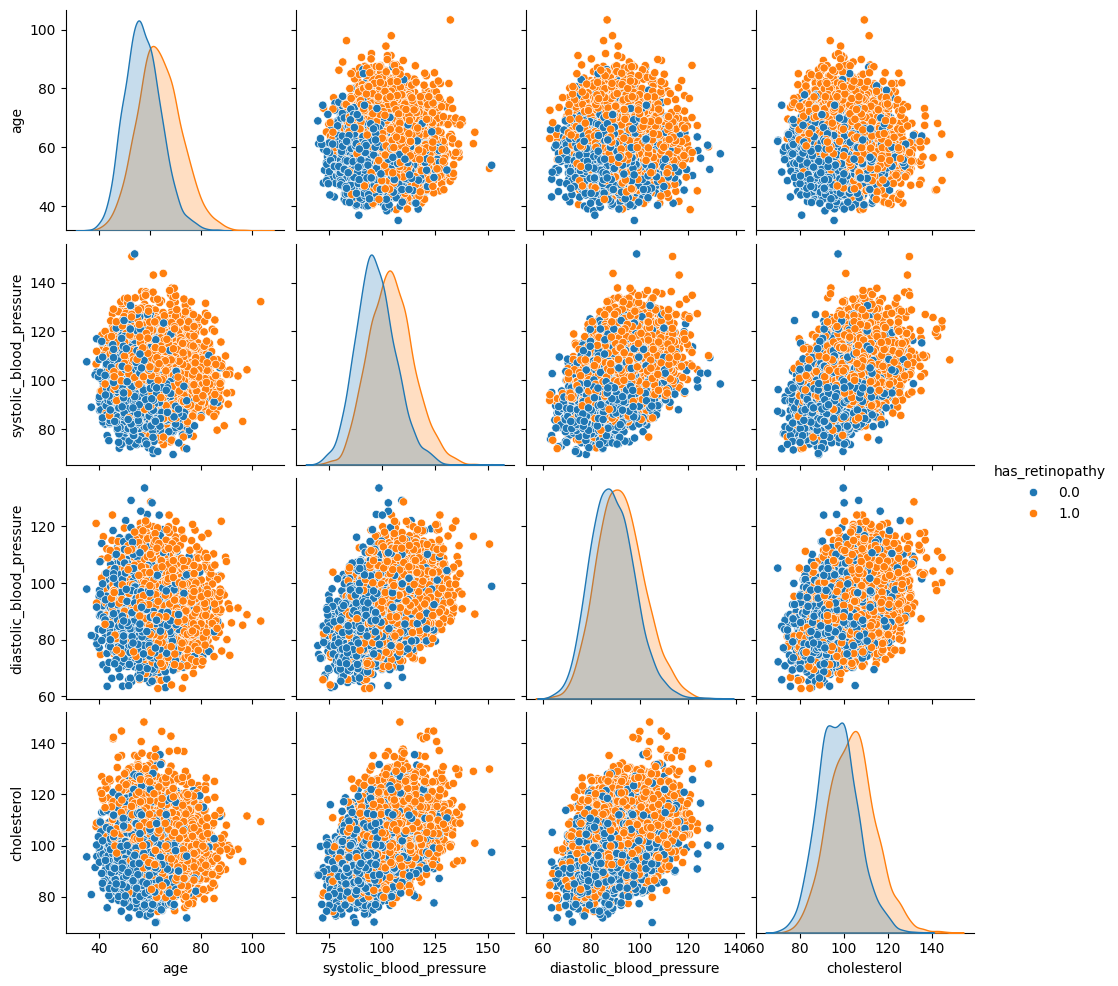

In [14]:
sns.pairplot(df, hue='has_retinopathy')
plt.show()

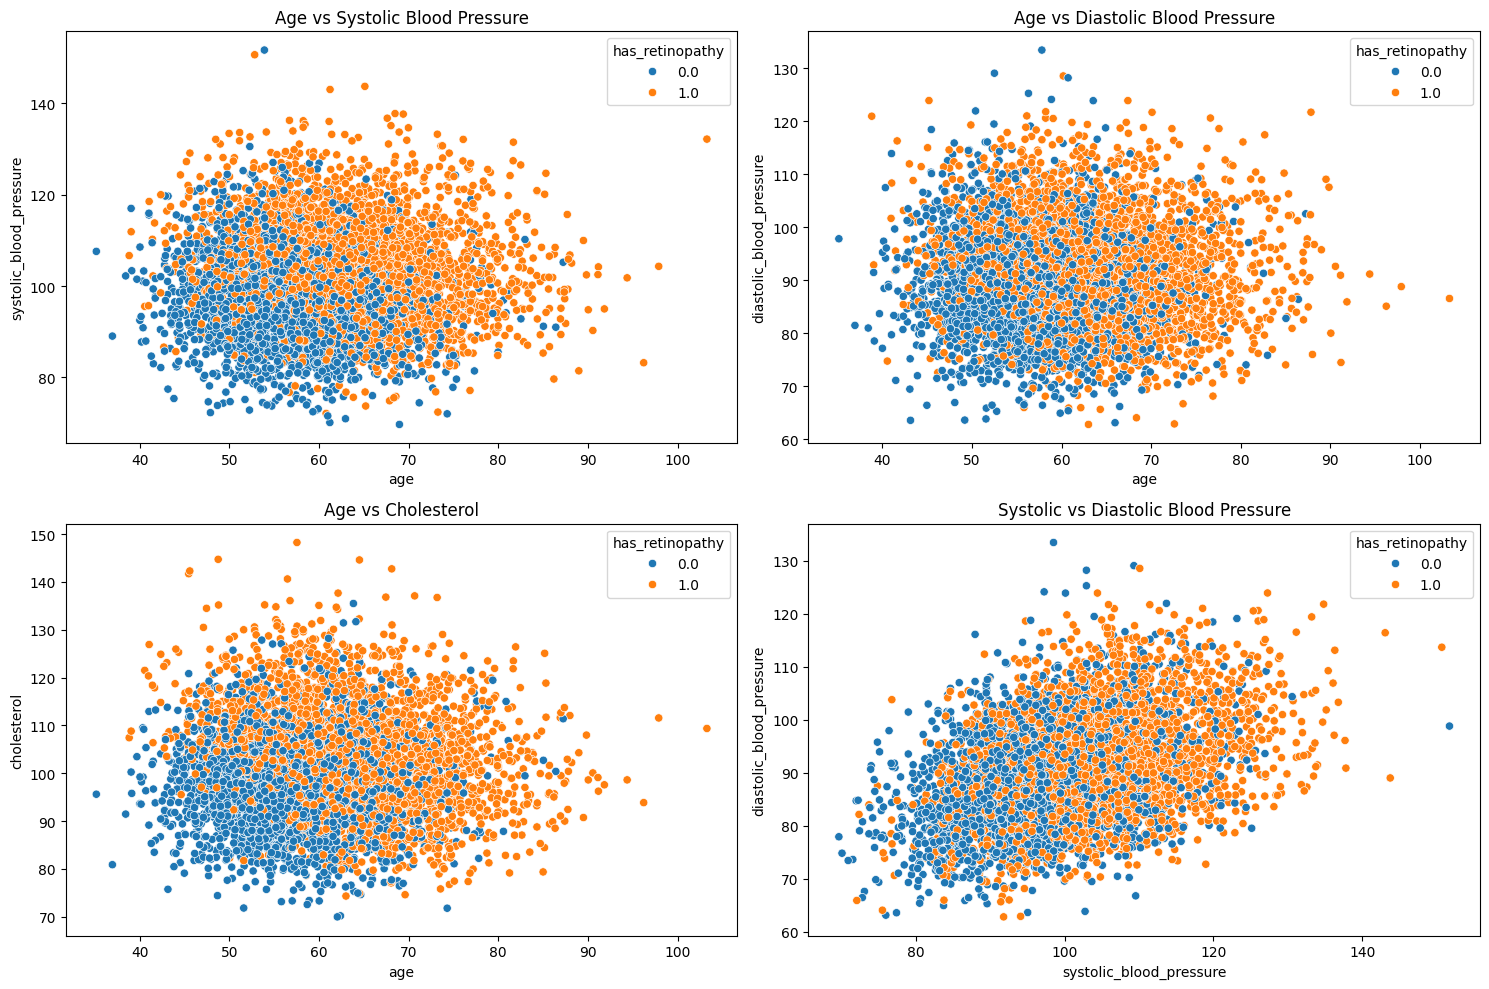

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(x='age', y='systolic_blood_pressure', hue='has_retinopathy', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Systolic Blood Pressure')

sns.scatterplot(x='age', y='diastolic_blood_pressure', hue='has_retinopathy', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Diastolic Blood Pressure')

sns.scatterplot(x='age', y='cholesterol', hue='has_retinopathy', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Age vs Cholesterol')

sns.scatterplot(x='systolic_blood_pressure', y='diastolic_blood_pressure', hue='has_retinopathy', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Systolic vs Diastolic Blood Pressure')

plt.tight_layout()
plt.show()


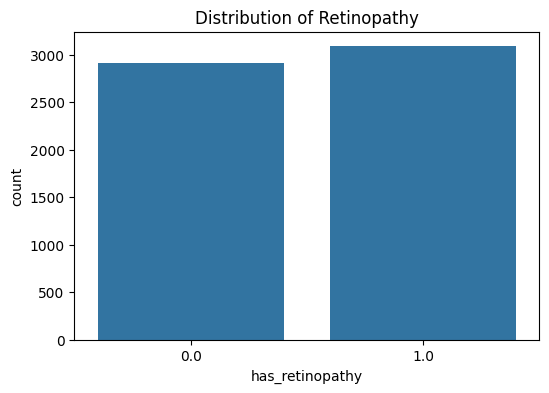

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='has_retinopathy', data=df)
plt.title('Distribution of Retinopathy')
plt.show()

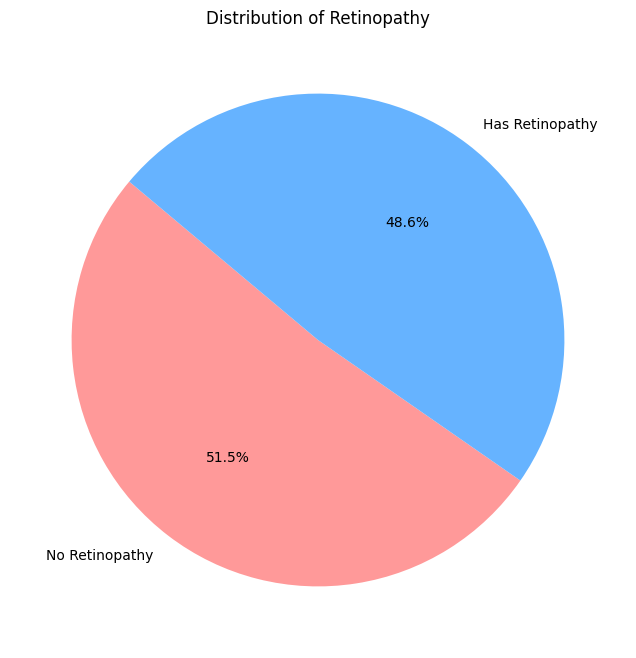

In [17]:
retinopathy_counts = df['has_retinopathy'].value_counts()

labels = ['No Retinopathy', 'Has Retinopathy']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(retinopathy_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Retinopathy')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
X = df[['age', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol']]
y = df['has_retinopathy']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(accuracy_log_reg)

0.7444444444444445


In [22]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(accuracy_svc)

0.7405555555555555


In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.6538888888888889


In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.7322222222222222


In [25]:
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Support Vector Accuracy: {accuracy_svc:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Logistic Regression Accuracy: 0.7444
Support Vector Accuracy: 0.7406
Decision Tree Accuracy: 0.6539
Random Forest Accuracy: 0.7322


In [26]:
# Define the accuracy scores
accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'SVC': accuracy_svc,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

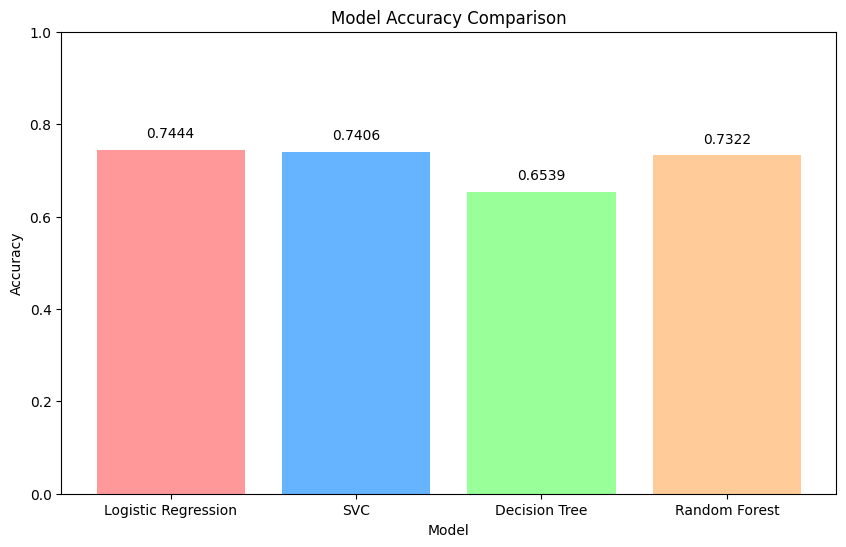

In [28]:
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['#ff9999', '#66b3ff',
                                                               '#99ff99', '#ffcc99'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02,
             f'{yval:.4f}', ha='center', va='bottom')

plt.show()

***